___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Before beginning your analysis, it is critical that you first examine and clean the dataset, to make working with it a more efficient process. You will practice fixing data types, handling missing values, and dropping columns and rows while learning about the Stanford Open Policing Project dataset.

***

## Examining the dataset

You'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the Stanford Open Policing Project.

Before beginning your analysis, it's important that you familiarize yourself with the dataset. You'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.

**INSTRUCTIONS**

*   Import pandas using the alias ``pd``.
*   Read the file police.csv into a DataFrame named ``ri``
*   Examine the first 5 rows of the ``DataFrame`` (known as the ``"head"``).
*   Count the number of missing values in each column: Use ``.isnull()`` to check which ``DataFrame`` elements are missing, and then take the ``.sum()`` to count the number of ``True`` values in each column.

In [165]:
import numpy as np
import pandas as pd

In [295]:
ri = pd.read_csv('police.csv')
ri.head()

/opt/anaconda3/envs/new_environment/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [296]:
ri.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [297]:
len(ri)

509681

***

## Dropping columns

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the ``DataFrame``, to make it easier for you to focus on the remaining columns.

You'll drop the ``county_name`` column because it only contains missing values, and you'll drop the ``state`` column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

**INSTRUCTIONS**

*   Examine the ``DataFrame``'s shape to find out the number of rows and columns.

*   Drop the columns that almost consist of missing values. 

*   Examine the ``.shape`` again to verify that there are now two fewer columns.

In [298]:
ri.drop(columns=['county_name','state'],axis=1, inplace=True)

In [299]:
ri.shape

(509681, 24)

***

## Dropping rows

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the ``driver_gender`` column will be critical to many of your analyses. Because only a small fraction of rows are missing ``driver_gender``, we'll drop those rows from the dataset.

**INSTRUCTIONS**

*   Count the number of missing values in each column.

*   Drop all rows that are missing ``driver_gender`` by passing the column name to the subset parameter of ``.dropna()``.
*   Count the number of missing values in each column again, to verify that none of the remaining rows are missing ``driver_gender``.
*   Examine the ``DataFrame``'s ``.shape`` to see how many rows and columns remain.

In [300]:
ri.dropna(axis=0, subset=['driver_gender'], how='any',inplace=True)
ri

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
3,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
5,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509666,RI-2015-47061,2015-12-31,22:46,Zone X1,NaN,NaN,0.0,M,1959.0,56.0,H,Hispanic,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X1
509667,RI-2015-47062,2015-12-31,22:47,Zone X4,NaN,NaN,500.0,M,1988.0,27.0,W,White,Registration Violation,Registration/plates,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
509668,RI-2015-47063,2015-12-31,23:08,Zone X3,NaN,NaN,200.0,M,1980.0,35.0,H,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3
509669,RI-2015-47064,2015-12-31,23:44,Zone K2,NaN,NaN,900.0,M,1984.0,31.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2


In [301]:
ri.isnull().sum()

id                            0
stop_date                     0
stop_time                     0
location_raw                  0
county_fips              480584
fine_grained_location    480584
police_department             0
driver_gender                 0
driver_age_raw                1
driver_age                 1638
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          462822
search_type              462822
contraband_found              0
stop_outcome                  0
is_arrested                   0
stop_duration                 0
out_of_state                808
drugs_related_stop            0
district                      0
dtype: int64

***

## Fixing a data type

We know that the ``is_arrested`` column currently has the ``object`` data type. In this exercise, we'll change the data type to ``bool``, which is the most suitable type for a column containing ``True`` and ``False`` values.

Fixing the data type will enable us to use mathematical operations on the ``is_arrested`` column that would not be possible otherwise.

**INSTRUCTIONS**

*   Examine the head of the ``is_arrested`` column to verify that it contains ``True`` and ``False`` values.
*   Check the current data type of ``is_arrested``.
*   Use the ``.astype()`` method to convert ``is_arrested`` to a ``bool`` column.
*   Check the new data type of ``is_arrested``, to confirm that it is now a ``bool`` column.

In [302]:
ri['is_arrested']= ri['is_arrested'].astype(bool)
ri['is_arrested'].dtypes



dtype('bool')

***

## Combining object columns

Currently, the date and time of each traffic stop are stored in separate object columns: ``stop_date`` and ``stop_time``.

You'll combine these two columns into a single column, and then convert it to ``datetime`` format. This will enable convenient date-based attributes that we'll use later in the course.

**INSTRUCTIONS**

*    Use a string method to concatenate ``stop_date`` and ``stop_time`` (separated by a space), and store the result in ``combined``.
*    Convert ``combined`` to ``datetime`` format, and store the result in a new column named ``stop_datetime``.
*    Examine the ``DataFrame`` ``.dtypes`` to confirm that ``stop_datetime`` is a datetime column.

In [303]:
combined_time = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')
combined_time

0         2005-01-02 01:55
1         2005-01-02 20:30
3         2005-01-04 12:55
4         2005-01-06 01:30
5         2005-01-12 08:05
                ...       
509666    2015-12-31 22:46
509667    2015-12-31 22:47
509668    2015-12-31 23:08
509669    2015-12-31 23:44
509670    2015-12-31 23:48
Name: stop_date, Length: 480584, dtype: object

In [304]:
ri['combined']=pd.to_datetime(combined_time)
#note you could also use 

In [305]:
ri

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined
0,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
3,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
4,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
5,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509666,RI-2015-47061,2015-12-31,22:46,Zone X1,NaN,NaN,0.0,M,1959.0,56.0,H,Hispanic,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X1,2015-12-31 22:46:00
509667,RI-2015-47062,2015-12-31,22:47,Zone X4,NaN,NaN,500.0,M,1988.0,27.0,W,White,Registration Violation,Registration/plates,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2015-12-31 22:47:00
509668,RI-2015-47063,2015-12-31,23:08,Zone X3,NaN,NaN,200.0,M,1980.0,35.0,H,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X3,2015-12-31 23:08:00
509669,RI-2015-47064,2015-12-31,23:44,Zone K2,NaN,NaN,900.0,M,1984.0,31.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2015-12-31 23:44:00


In [306]:
ri.drop(['stop_date','stop_time','county_fips','fine_grained_location'],axis=1,inplace=True)

The last step that you'll take in this chapter is to set the ``stop_datetime`` column as the ``DataFrame``'s index. By replacing the default index with a ``DatetimeIndex``, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course.

**INSTRUCTIONS**

*   Set ``stop_datetime`` as the ``DataFrame`` index.
*   Examine the index to verify that it is a ``DatetimeIndex``.
*   Examine the ``DataFrame`` columns to confirm that ``stop_datetime`` is no longer one of the columns.

In [307]:
ri.rename(columns={'combined':'stop_datetime'}, inplace=True)

In [308]:
ri.set_index('stop_datetime', inplace=True)

# Part 2 solution

**INSTRUCTIONS**

*   Count the unique values in the ``violation`` column, to see what violations are being committed by all drivers.
*   Express the violation counts as proportions of the total.



In [309]:
ri['violation'].unique()

array(['Speeding', 'Equipment', 'Other', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [310]:
ri['violation'].value_counts(dropna=False)

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

In [311]:
ri['violation'].value_counts(dropna=False)/len(ri['violation'])

Speeding               0.559186
Moving violation       0.187747
Equipment              0.127449
Other                  0.050389
Registration/plates    0.041262
Seat belt              0.033967
Name: violation, dtype: float64

In [312]:
ri['driver_gender'].value_counts(dropna=True)

M    349446
F    131138
Name: driver_gender, dtype: int64

## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

You'll first create a ``DataFrame`` for each gender, and then analyze the ``violations`` in each ``DataFrame`` separately.

**INSTRUCTIONS**

*   Create a ``DataFrame``, female, that only contains rows in which ``driver_gender`` is ``'F'``.
*   Create a ``DataFrame``, male, that only contains rows in which ``driver_gender`` is ``'M'``.
*   Count the ``violations`` committed by female drivers and express them as proportions.
*   Count the violations committed by male drivers and express them as proportions.

In [313]:
F_filt = ri[ri['driver_gender']=='F']
F_filt.head()


,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-02-24 01:20:00,RI-2005-00016,Zone X3,200,F,1983.0,22.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3
2005-03-14 10:00:00,RI-2005-00019,Zone K3,300,F,1984.0,21.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2005-03-29 23:20:00,RI-2005-00026,Zone K3,300,F,1971.0,34.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-06-06 13:20:00,RI-2005-00035,Zone X4,500,F,1986.0,19.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-06-18 16:30:00,RI-2005-00037,Zone X4,500,F,1964.0,41.0,W,White,Other Traffic Violation,Moving violation,False,NaN,NaN,False,Arrest Driver,True,30+ Min,False,False,Zone X4


In [314]:
M_filt = ri[ri['driver_gender']=='M']
M_filt.head()


,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [315]:
F_filt['violation'].value_counts(normalize=True)

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64

In [316]:
M_filt['violation'].value_counts(normalize=True)

Speeding               0.522364
Moving violation       0.206948
Equipment              0.135102
Other                  0.058450
Registration/plates    0.040581
Seat belt              0.036555
Name: violation, dtype: float64

In [317]:
ri.groupby(['driver_gender'])['violation'].value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.657308
               Moving violation       0.136581
               Equipment              0.107055
               Registration/plates    0.043077
               Other                  0.028908
               Seat belt              0.027071
M              Speeding               0.522364
               Moving violation       0.206948
               Equipment              0.135102
               Other                  0.058450
               Registration/plates    0.040581
               Seat belt              0.036555
Name: violation, dtype: float64

## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two ``DataFrames`` of drivers who were stopped for ``speeding``: one containing ***females*** and the other containing ***males***.

Then, for each **gender**, you'll use the ``stop_outcome`` column to calculate what percentage of stops resulted in a ``"Citation"`` (meaning a ticket) versus a ``"Warning"``.

**INSTRUCTIONS**

*   Create a ``DataFrame``, ``female_and_speeding``, that only includes female drivers who were stopped for speeding.
*   Create a ``DataFrame``, ``male_and_speeding``, that only includes male drivers who were stopped for speeding.
*   Count the **stop outcomes** for the female drivers and express them as proportions.
*   Count the **stop outcomes** for the male drivers and express them as proportions.

In [318]:
female_speeding = ri[(ri['driver_gender']=='F') & (ri['violation']=='Speeding')]
female_speeding

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-02-24 01:20:00,RI-2005-00016,Zone X3,200,F,1983.0,22.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3
2005-03-14 10:00:00,RI-2005-00019,Zone K3,300,F,1984.0,21.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2005-03-29 23:20:00,RI-2005-00026,Zone K3,300,F,1971.0,34.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-06-06 13:20:00,RI-2005-00035,Zone X4,500,F,1986.0,19.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-07-06 11:22:00,RI-2005-00038,Zone X1,0,F,1973.0,32.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:44:00,RI-2015-47028,Zone K2,500.0,F,1969.0,46.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Warning,False,0-15 Min,False,False,Zone K2
2015-12-31 20:05:00,RI-2015-47031,Zone K2,900.0,F,1996.0,19.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2
2015-12-31 20:42:00,RI-2015-47041,Zone K2,900.0,F,1978.0,37.0,H,Hispanic,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K2


In [319]:
male_speeding = ri[(ri['driver_gender']=='M') & (ri['violation']=='Speeding')]
male_speeding

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-18 08:15:00,RI-2005-00007,Zone K3,300,M,1965.0,40.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-01-23 23:15:00,RI-2005-00009,Zone K3,300,M,1972.0,33.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-01-24 20:32:00,RI-2005-00010,Zone K1,600,M,1987.0,18.0,W,White,Speeding,Speeding,True,Probable Cause,Probable Cause,True,Citation,False,0-15 Min,True,True,Zone K1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 20:50:00,RI-2015-47044,Zone K2,500.0,M,1994.0,21.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2
2015-12-31 21:42:00,RI-2015-47049,Zone X1,0.0,M,1993.0,22.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X1
2015-12-31 22:26:00,RI-2015-47058,Zone K3,300.0,M,1964.0,51.0,I,Asian,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3


In [320]:
female_speeding[female_speeding.isin(['Citation'])].loc[:,['stop_outcome']].value_counts()

stop_outcome
Citation        82168
dtype: int64

In [321]:
female_speeding['stop_outcome'].value_counts(normalize=True)

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64

In [322]:
male_speeding['stop_outcome'].value_counts(normalize=True)

Citation            0.944636
Warning             0.036086
Arrest Driver       0.015767
Arrest Passenger    0.001265
N/D                 0.001183
No Action           0.001063
Name: stop_outcome, dtype: float64

In [323]:
ri.groupby(['violation','driver_gender'])['stop_outcome'].value_counts(normalize=True)

violation  driver_gender  stop_outcome    
Equipment  F              Citation            0.727830
                          Warning             0.157490
                          N/D                 0.047938
                          Arrest Driver       0.040387
                          Arrest Passenger    0.021227
                                                ...   
Speeding   M              Warning             0.036086
                          Arrest Driver       0.015767
                          Arrest Passenger    0.001265
                          N/D                 0.001183
                          No Action           0.001063
Name: stop_outcome, Length: 71, dtype: float64

## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops that result in a vehicle search, also known as the **search rate**.

**INSTRUCTIONS**

*   Check the data type of ``search_conducted`` to confirm that it's a ``Boolean Series``.
*   Calculate the search rate by counting the ``Series`` values and expressing them as proportions.
*   Calculate the search rate by taking the mean of the ``Series``. (It should match the proportion of ``True`` values calculated above.)

In [324]:
ri['search_conducted'].dtypes

dtype('O')

In [325]:
ri['search_conducted'].value_counts()

False    462822
True      17762
Name: search_conducted, dtype: int64

In [326]:
ri['search_conducted'].value_counts(normalize=True)

False    0.963041
True     0.036959
Name: search_conducted, dtype: float64

In [327]:
ri['search_conducted'].mean()

0.036959199640437465

In [328]:
ri.groupby(['search_conducted']).mean()

,driver_age_raw,driver_age,contraband_found,is_arrested,drugs_related_stop
search_conducted,,,,,
False,1970.239767,34.109658,0.000000,0.022505,0.000000
True,1978.421462,30.660000,0.370397,0.348328,0.268269


## Comparing search rates by gender

You'll compare the rates at which **female** and **male** drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about **3.8%**.

First, you'll filter the ``DataFrame`` by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a ``.groupby()``.

**INSTRUCTIONS 1/3**

*   Filter the ``DataFrame`` to only include **female** drivers, and then calculate the search rate by taking the mean of ``search_conducted``.

In [329]:
female_s = ri[(ri['driver_gender']=='F')]
female_s['search_conducted'].value_counts()

False    128679
True       2459
Name: search_conducted, dtype: int64

In [330]:
female_s['search_conducted'].mean()

0.018751239152648355

**INSTRUCTIONS 2/3**

*   Filter the ``DataFrame`` to only include **male** drivers, and then repeat the search rate calculation.



In [331]:
male_s = ri[(ri['driver_gender']=='M')]
male_s['search_conducted'].mean()

0.04379217389811301

In [393]:
ri['search_conducted'].dtype

dtype('bool')

**INSTRUCTIONS 3/3**

*   Group by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)



In [394]:
ri.groupby(['driver_gender'])['search_conducted'].mean()

driver_gender
F    0.018751
M    0.043792
Name: search_conducted, dtype: float64

## Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

**INSTRUCTIONS 1/2**

*   Use a ``.groupby()`` to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

In [395]:
ri.groupby(['driver_gender','violation'])[['search_conducted']].mean()

search_conducted
driver_gender violation                            
F             Equipment                    0.040245
              Moving violation             0.038021
              Other                        0.045898
              Registration/plates          0.054700
              Seat belt                    0.017746
              Speeding                     0.007738
M             Equipment                    0.070916
              Moving violation             0.059156
              Other                        0.046120
              Registration/plates          0.103589
              Seat belt                    0.031705
              Speeding                     0.026630

**INSTRUCTIONS 2/2**

*   Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.



In [396]:
ri.groupby(['violation','driver_gender'])[['search_conducted']].mean()

search_conducted
violation           driver_gender                  
Equipment           F                      0.040245
                    M                      0.070916
Moving violation    F                      0.038021
                    M                      0.059156
Other               F                      0.045898
                    M                      0.046120
Registration/plates F                      0.054700
                    M                      0.103589
Seat belt           F                      0.017746
                    M                      0.031705
Speeding            F                      0.007738
                    M                      0.026630

## Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a ``"protective frisk."``

You'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

**INSTRUCTIONS**

*   Count the ``search_type`` values to see how many times ``"Protective Frisk"`` was the only search type.
*   Create a new column, frisk, that is ``True`` if ``search_type`` contains the string ``"Protective Frisk"`` and ``False`` otherwise.
*   Check the data type of frisk to confirm that it's a ``Boolean Series``.
*   Take the sum of frisk to count the total number of frisks.

In [397]:
ri['search_type'].value_counts()

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

In [398]:
ri['frisk'] = ri['search_type'].str.contains('Protective Frisk', na=False)
ri['frisk'].head()

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
Name: frisk, dtype: bool

In [399]:
ri['frisk'].dtype

dtype('bool')

In [400]:
ri['frisk'].sum()

1598

## Comparing frisk rates by gender

You'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the ``DataFrame`` to only include the relevant subset of data, namely stops in which a search was conducted.

**INSTRUCTIONS**

*   Create a ``DataFrame``, searched, that only contains rows in which ``search_conducted`` is ``True``.
*   Take the mean of the frisk column to find out what percentage of searches included a frisk.
*   Calculate the frisk rate for each gender using a ``.groupby()``.

In [401]:
searched = ri[(ri['search_conducted'])]
searched

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-24 20:32:00,RI-2005-00010,Zone K1,600,M,1987.0,18.0,W,White,Speeding,Speeding,True,Probable Cause,Probable Cause,True,Citation,False,0-15 Min,True,True,Zone K1,False
2005-02-09 03:05:00,RI-2005-00011,Zone X4,500,M,1976.0,29.0,W,White,Registration Violation,Registration/plates,True,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",False,Citation,False,0-15 Min,False,False,Zone X4,True
2005-08-28 01:00:00,RI-2005-00084,Zone X1,0,M,1979.0,26.0,W,White,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Terry Frisk","Incident to Arrest,Protective Frisk",False,Arrest Driver,True,16-30 Min,True,False,Zone X1,True
2005-09-15 02:20:00,RI-2005-00094,Zone X4,500,M,1988.0,17.0,W,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone X4,False
2005-09-24 02:20:00,RI-2005-00115,Zone K3,300,M,1987.0,18.0,W,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone K3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28 11:05:00,RI-2015-46706,Zone K3,300.0,F,1996.0,19.0,W,White,APB,Other,True,Incident to Arrest,Incident to Arrest,True,Citation,False,16-30 Min,True,True,Zone K3,False
2015-12-30 01:37:00,RI-2015-46870,Zone X4,500.0,M,1979.0,36.0,W,White,Registration Violation,Registration/plates,True,Terry Frisk,Protective Frisk,False,Citation,False,0-15 Min,False,False,Zone X4,True
2015-12-30 08:51:00,RI-2015-46903,Zone K3,300.0,F,1987.0,28.0,H,Hispanic,Speeding,Speeding,True,"Probable Cause,Reasonable Suspicion","Probable Cause,Reasonable Suspicion",True,Citation,False,30+ Min,True,True,Zone K3,False


In [402]:
searched['frisk'].mean()

0.08996734601959239

In [403]:
ri.groupby(['driver_gender'])['frisk'].mean()

driver_gender
F    0.001251
M    0.004104
Name: frisk, dtype: float64

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate  Part 3

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [404]:
pd.set_option('display.max_columns',None )

In [405]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False


In [406]:
ri.columns

Index(['id', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district',
       'frisk'],
      dtype='object')

In [407]:
ri['is_arrested'].mean()

0.03454755048024903

In [408]:
ri.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
           dtype='int64', name='stop_datetime', length=480584)

In [409]:
ri.index.hour.unique()

Int64Index([ 1, 20, 12,  8, 17, 23,  3,  2,  4,  5, 10, 15, 14,  9,  0, 21, 22,
            13, 16, 11,  7, 19, 18,  6],
           dtype='int64', name='stop_datetime')

In [410]:
hourly_arrest_rate= ri.groupby(ri.index.hour)['is_arrested'].mean()

In [411]:
hourly_arrest_rate

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [412]:
import matplotlib.pyplot as plt

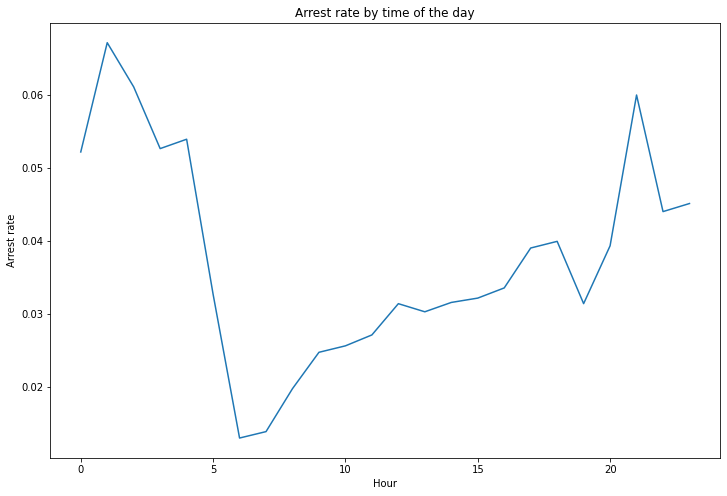

In [413]:
plt.figure(figsize=(12,8))
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest rate')
plt.title('Arrest rate by time of the day')
plt.show()

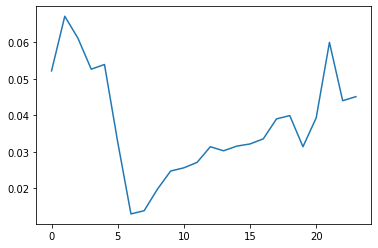

In [414]:
y = hourly_arrest_rate.values
x = hourly_arrest_rate.index
plt.plot(x,y)

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [415]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False


In [416]:
ri['drugs_related_stop'].resample('A').mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [417]:
ri['drugs_related_stop'].resample('M').mean() #by month

stop_datetime
2005-01-31    0.111111
2005-02-28    0.000000
2005-03-31    0.000000
2005-04-30    0.000000
2005-05-31    0.000000
                ...   
2015-08-31    0.009389
2015-09-30    0.008172
2015-10-31    0.006429
2015-11-30    0.007361
2015-12-31    0.008844
Freq: M, Name: drugs_related_stop, Length: 132, dtype: float64

In [427]:
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()

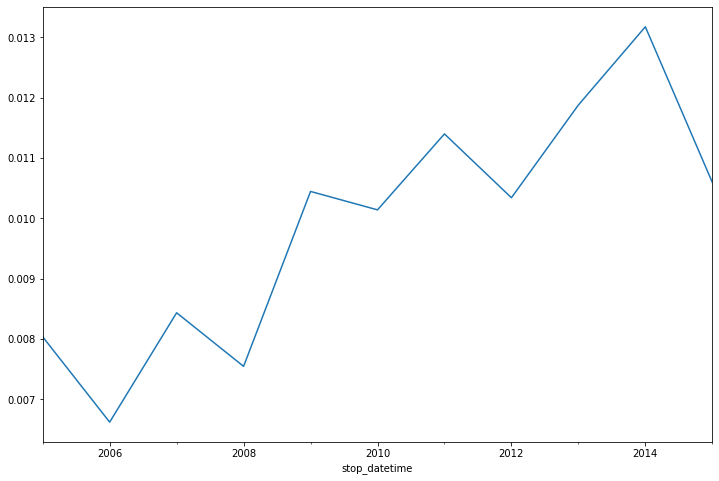

In [428]:
plt.figure(figsize=(12,8))
annual_drug_rate.plot()
plt.show()

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [429]:
ri['search_conducted'].head()

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
Name: search_conducted, dtype: bool

In [430]:

ri['search_conducted']= ri['search_conducted'].astype(bool)

In [431]:
ri['search_conducted'].dtype


dtype('bool')

In [432]:
annual_search_rate= ri['search_conducted'].resample('A').mean()
annual_search_rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [433]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = "columns")

In [434]:
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006624,0.037748
2007-12-31,0.008437,0.041844
2008-12-31,0.007549,0.039544
2009-12-31,0.010447,0.049849
2010-12-31,0.010142,0.042089
2011-12-31,0.011400,0.037767
2012-12-31,0.010343,0.032278
2013-12-31,0.011879,0.029054


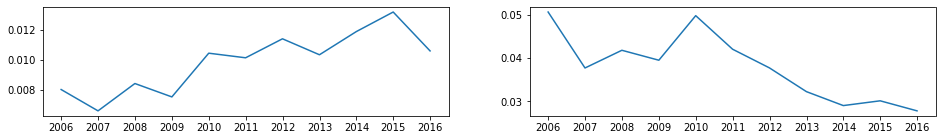

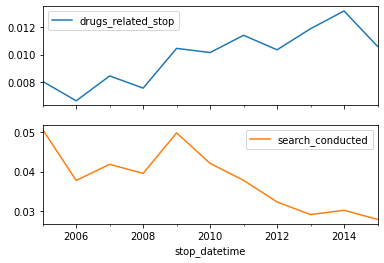

In [435]:
plt.figure(figsize=(16,2))
plt.subplot(1,2,1)
plt.plot(annual.index, annual.drugs_related_stop)
plt.subplot(1,2,2)
plt.plot(annual.index,annual.search_conducted);
annual.plot(subplots = True)
plt.show()

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

